# Text as Data: A Practical Introduction in Python

**Author**: June Yang, CSDE and eScience Institute 

**Date**: Sep 2024

Welcome to this workshop on **Text as Data**! In this session, we'll explore key concepts from four critical areas:

1. **Resources and Materials**
1. **Retrieving Text Data Using APIs**
2. **Selection and Representation**
3. **Discovery**
4. **Measurement**

Each section will provide a general overview and hands-on Python examples to solidify your understanding. Note that this is a practical workshop, so we're not going deep into the theoretical details, principles, biases, and ethical considerations of working with text data. This does not mean however that we do not care about these aspects. In fact, thinking about biases and ethical issues is **crucial** when working with text data. I encourage you check out the materials listed below, for detailed discussions on topics that are not covered in this workshop. 

---

## Table of Contents

1. [Resources and Materials](#Resources-and-Materials)
2. [Retrieving Text Data Using APIs](#Retrieving-Text-Data-Using-APIs)
    - [Overview](#Overview)
    - [Understanding APIs](#Understanding-APIs)
    - [Accessing APIs in Python](#Accessing-APIs-in-Python)
    - [Coding Example](#Coding-Example)
3. [Selection and Representation](#Selection-and-Representation)
    - [Overview](#Overview-1)
    - [Understanding Text Data](#Understanding-Text-Data)
    - [Data Selection](#Data-Selection)
    - [Text Preprocessing](#Text-Preprocessing)
    - [Feature Representation](#Feature-Representation)
    - [Coding Example](#Coding-Example-1)
4. [Discovery](#Discovery)
    - [Overview](#Overview-2)
    - [Unsupervised Learning](#Unsupervised-Learning)
    - [Topic Modeling](#Topic-Modeling)
    - [Clustering](#Clustering)
    - [Coding Example](#Coding-Example-2)
5. [Measurement](#Measurement)
    - [Overview](#Overview-3)
    - [Sentiment Analysis](#Sentiment-Analysis)
    - [Readability Scores](#Readability-Scores)
    - [Content Analysis](#Content-Analysis)
    - [Coding Example](#Coding-Example-3)
6. [Conclusion](#Conclusion)
7. [Additional Resources](#Additional-Resources)

---

## Resources and Materials

In the age of information, text data is abundant—from social media posts and news articles to academic papers and policy documents. Understanding how to retrieve, process, and analyze this unstructured data is crucial for insights in machine learning and social sciences.

This tutorial is based on Python 3.8 and the following libraries:
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)
- [NumPy](https://numpy.org/install/)
- [Scikit-learn](https://scikit-learn.org/stable/install.html)
- [NLTK](https://www.nltk.org/install.html)
- [Gensim](https://radimrehurek.com/gensim/install.html)
- [requests](https://requests.readthedocs.io/en/latest/user/install/#install)
- [json](https://docs.python.org/3/library/json.html)
- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-beautiful-soup)
- [spaCy](https://spacy.io/usage)
- [NLTK](https://www.nltk.org/install.html)
- [matplotlib](https://matplotlib.org/stable/users/installing/index.html)

Specific use of the packages will be introduced below. 

In addition, this tutorial is based on the following books and resources:

- <img src="https://pup-assets.imgix.net/onix/images/9780691207551.jpg" alt="Text as Data: A New Framework for Machine Learning and the Social Sciences" width="300">
- <img src="https://learning.oreilly.com/library/cover/9781492054047/250w/" alt="Text as Data: A Practical Introduction in Python" width="300">
- [The Summer Institute in Computational Social Science Learning Materials](https://sicss.io/curriculum)

More resources could be found in the [Additional Resources](#Additional-Resources) at the bottom of this tutorial.

---

## Appendix: Retrieving Text Data Using APIs

### Overview

Before we can analyze text data, we need to **retrieve** it. One common way to collect text data is through **Application Programming Interfaces (APIs)**. APIs allow you to programmatically access data from various platforms and services.

Key concepts:

- **Understanding APIs**: What they are and how they work.
- **Accessing APIs in Python**: Using libraries to make API requests.
- **Handling API Data**: Processing and storing the retrieved data.

### Understanding APIs

**What is an API?**

- An **API (Application Programming Interface)** is a set of rules and protocols that allows different software applications to communicate with each other.
- APIs enable you to access data or functionality from another application or service.

**Why Use APIs for Text Data?**

- **Access Real-Time Data**: APIs can provide up-to-date information.
- **Automate Data Retrieval**: Programmatically collect data without manual intervention.
- **Customize Data Queries**: Fetch specific data relevant to your research.

**Common Text Data APIs**

- **News APIs**: Access news articles from various sources.
- **Social Media APIs**: Retrieve posts from platforms like Twitter, Reddit, or Facebook.
- **Open Data APIs**: Government or organizational data repositories.

### Accessing APIs in Python

**HTTP Requests**

- APIs often use HTTP requests to send and receive data.
- Common HTTP methods: `GET`, `POST`, `PUT`, `DELETE`.

**API Authentication**

- Some APIs require an **API key** or **OAuth** for authentication.
- Always keep your API keys secure and never share them publicly.

**Python Libraries for API Access**

- `requests`: A simple HTTP library for Python.
- `json`: To parse JSON responses.
- Specific libraries: Some APIs have dedicated Python wrappers (e.g., `tweepy` for Twitter).

---

### Coding Example

We'll walk through an example of accessing a News API to retrieve recent articles on a specific topic.

#### Import Libraries

In [1]:
import requests
import json
import pandas as pd

#### Setting Up API Access

**Choose an API**

For this example, we'll use the [NewsAPI](https://newsapi.org/), which allows us to access news articles from various sources.

**Sign Up and Get an API Key**

1. Visit [NewsAPI.org](https://newsapi.org/register).
2. Sign up for a free account.
3. Obtain your API key from the dashboard.

**Store Your API Key Securely**

In [ ]:
# Store your API key as a string
api_key = 'YOUR_NEWSAPI_KEY_HERE'

> **Important**: Replace `'YOUR_NEWSAPI_KEY_HERE'` with your actual API key. Keep your API key private and do not share it.

#### Retrieving Data from an API

**Define the API Endpoint and Parameters**

In [ ]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything'

# Define the parameters
parameters = {
    'q': 'climate change',  # Search query
    'pageSize': 100,        # Number of results per page
    'apiKey': api_key       # Your API key
}

**Make the API Request**

In [ ]:
# Make the request
response = requests.get(url, params=parameters)

# Check the status code
print(f"Status Code: {response.status_code}")

- **Status Code 200**: Success
- Other codes indicate issues (e.g., 401 Unauthorized, 429 Too Many Requests)

**Parse the JSON Response**

In [ ]:
# Parse the JSON content
data = response.json()

# Check if there are articles
if data['status'] == 'ok':
    articles = data['articles']
    print(f"Number of articles retrieved: {len(articles)}")
else:
    print("Failed to retrieve articles")

#### Processing and Saving the Data

**Extract Relevant Information**

In [ ]:
# Create a list to store article information
article_list = []

for article in articles:
    article_info = {
        'source': article['source']['name'],
        'author': article['author'],
        'title': article['title'],
        'description': article['description'],
        'content': article['content'],
        'publishedAt': article['publishedAt'],
        'url': article['url']
    }
    article_list.append(article_info)

**Create a DataFrame**

In [ ]:
# Convert the list to a DataFrame
df = pd.DataFrame(article_list)

# Display the first few entries
df.head()

**Handle Missing Data**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Optionally, drop rows with missing content
df = df.dropna(subset=['content'])

**Save the Data**

In [ ]:
# Save to CSV
df.to_csv('news_articles.csv', index=False)

# Save to JSON
df.to_json('news_articles.json', orient='records', lines=True)

**Display Sample Articles**

In [ ]:
# Display titles and content
for index, row in df.iterrows():
    print(f"Article {index+1}: {row['title']}")
    print(f"Content: {row['content']}
")
    if index >= 2:  # Display only the first 3 articles
        break

---

### Exercise

**Try it yourself**:

1. **Change the Query**: Modify the search query to a topic of your interest (e.g., "artificial intelligence").
2. **Explore Other Parameters**: Adjust parameters like `from`, `to`, `language`, or `sources`.
   - Example: Add `'language': 'en'` to fetch only English articles.
3. **Handle Pagination**: Retrieve more articles by handling pagination.
   - Use the `page` parameter to navigate through pages.
4. **Rate Limiting**: Be mindful of the API's rate limits to avoid being blocked.

**Note**: Always refer to the API's documentation for available parameters and usage guidelines.

---

### Additional Example: Using Reddit API with `PRAW`

**Install and Import PRAW**

In [ ]:
# Install PRAW (Python Reddit API Wrapper)
!pip install praw

import praw

**Set Up Reddit API Access**

1. Create a Reddit account if you don't have one.
2. Go to [Reddit Apps](https://www.reddit.com/prefs/apps) to create an app.
3. Choose **script** and fill in the required details.
4. Obtain your `client_id`, `client_secret`, and `user_agent`.

**Initialize Reddit Instance**

In [ ]:
# Initialize Reddit instance
reddit = praw.Reddit(
    client_id='YOUR_CLIENT_ID',
    client_secret='YOUR_CLIENT_SECRET',
    user_agent='YOUR_USER_AGENT'
)

> **Important**: Replace `'YOUR_CLIENT_ID'`, `'YOUR_CLIENT_SECRET'`, and `'YOUR_USER_AGENT'` with your actual credentials.

**Retrieve Posts from a Subreddit**

In [ ]:
# Choose a subreddit
subreddit_name = 'datascience'

# Get the subreddit
subreddit = reddit.subreddit(subreddit_name)

# Fetch the top posts
top_posts = subreddit.top(limit=10)

# Store post information
posts = []

for post in top_posts:
    post_info = {
        'title': post.title,
        'author': str(post.author),
        'score': post.score,
        'url': post.url,
        'num_comments': post.num_comments,
        'created': post.created_utc,
        'selftext': post.selftext
    }
    posts.append(post_info)

# Convert to DataFrame
df_reddit = pd.DataFrame(posts)
df_reddit.head()

**Save the Data**

In [ ]:
# Save to CSV
df_reddit.to_csv('reddit_posts.csv', index=False)

---

## Selection and Representation

### Overview

The first step in the text analysis process often involves **choosing** the right text data and converting it into a **numerical** format that models can understand. Before we dive into the code, we need to start with basic principles and concepts of selecting and representing text data.

**Key Principles**
- **Principle 1**: Question-Specific Corpus Construction
- **Principle 2**: No Values-Free Corpus Construction
- **Principle 3**: No Right Way to Represent Text
- **Principle 4**: Validation

**Key concepts**

- **Data Selection**: Identifying and collecting relevant text data (corpora) for analysis.
- **Text Preprocessing**: Cleaning and preparing text data for analysis.
- **Feature Representation**: Converting text into numerical features that models can process.

---

### How to Select and Present Text Data Using Python?

We'll walk through an example using the `nltk`, `scikit-learn`, and `matplotlib` libraries to preprocess text data and represent it numerically.

#### Data Selection

Selecting the appropriate text data is the first step:

- **Define Objectives**: What are you trying to find out?
- **Source Data**: Collect data from reliable sources (e.g., news articles, social media).
- **Sampling**: Ensure your data is representative of the population you're studying.

What are the possible sources of bias you can think of in the process of selecting data?

In the example below, we will use the NLTK movie reviews corpus to study the sentiment of movie reviews.

##### Import Libraries

In [2]:
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download NLTK data files (only need to run once)
nltk.download('punkt') # tokenizer  
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatizer

# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/junheyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Loading Data


In [3]:
# Download NLTK movie reviews corpus
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/junheyang/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


We can examine the movie_reviews corpus by using the following methods. 

In [4]:
# movie_reviews.fileids()
# movie_reviews.categories()
# movie_reviews.words()
# nltk.FreqDist(movie_reviews.words())
nltk.FreqDist(movie_reviews.words())['happy']

215

We then make the movie reviews data into a dataframe. 

In [5]:
# Load movie reviews data
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

# Create a DataFrame
df = pd.DataFrame({'Review': documents, 'Label': labels})

In [6]:
# Check the number of documents
print(f"Number of documents: {len(df)}")

# Display the first few reviews
df.head()

Number of documents: 2000


,Review,Label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


#### Text Preprocessing

Before diving into the analysis, it's essential to understand the nature of text data. As we could tell from the example, text data can be:

- **Unstructured**: Text is unstructured, making it challenging to process directly.
- **Variability**: Text can vary in length, style, and content.
- **Noise**: Text data often contains typos, slang, and irrelevant information.

Text preprocessing is crucial for cleaning and preparing your data. It usually involves the following steps:

- **Choose the unit of analysis**: We could choose the whole document as the unit of analysis, or choose sentences or paragraphs as the unit of analysis.
- **Tokenization**: Splitting text into words or sentences.
- **Reduce Complexity**:
  - Lowercase
  - Remove Punctuation
  - Remove Stop Words
  - Create Equivalences Classes (Lemmatize/Stem)
  - Filter by Frequency

##### Define Preprocessing Function

In [7]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

##### Apply Preprocessing

In [8]:
df['Processed_Review'] = df['Review'].apply(preprocess_text)
df.head()

,Review,Label,Processed_Review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


#### Feature Representation

Once the text is cleaned, we need to convert it into numerical features to come up with a **document-feature matrix**. A document-feature matrix is a matrix where each row represents a different document, and each column represents a different feature we use to represent the document. This throws away a lot of information - most notably word order - but provides the researcher with a parsimonious representation of the document that is useful for many purposes.

We start from the most basic feature representation:

- **Bag-of-Words (BoW)**: Represents text as the frequency of words.

##### Bag-of-Words Representation

The most common feature representation is the bag-of-words representation. It represents text as the frequency of words. We'll use the `CountVectorizer` function from `scikit-learn` to convert the text data into the bag-of-words representation.

In [10]:
# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We first use `CountVectorizer` to create an instance of the CountVectorizer class. Then, using `fit_transform`, we have the vectorizer learns the vocabulary from the input texts(the `fit` part). It then creates a document-feature matrix where each row represents a document, and each column represents a feature (in this case, the number of times each word appears in the document), this is the `transform` part.

The result, `X_bow`, is a sparse matrix. It's called `Bag of Words` because it disregards grammer and word order, and only looks at the frequency of each word in each document.

In [11]:
# Initialize CountVectorizer
vectorizer = CountVectorizer() # creating the instance first will allow us to use the methods associated with the class
X_bow = vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(vectorizer.get_feature_names_out())

# Display the Bag-of-Words representation
print("\nBag-of-Words Representation:")
print(X_bow.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

Bag-of-Words Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We can also turn the bag-of-words sparse matrix into a dataframe to take a look at the representation more clearly. 

In [12]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
bow_array = X_bow.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# Display the first few rows and columns
print("\nBag-of-Words Representation (first 5 documents, first 10 features):")
print(bow_df.iloc[:5, :10])  # Adjust these numbers as needed

# If you want to see all features for a specific document:
doc_index = 0  # Change this to view different documents
print(f"\nAll features for document {doc_index}:")
print(bow_df.iloc[doc_index].loc[bow_df.iloc[doc_index] != 0].sort_values(ascending=False))


Bag-of-Words Representation (first 5 documents, first 10 features):
   aa  aaa  aaaaaaaaah  aaaaaaaahhhh  aaaaaah  aaaahhhs  aahs  aaliyah  \
0   0    0           0             0        0         0     0        0   
1   0    0           0             0        0         0     0        0   
2   0    0           0             0        0         0     0        0   
3   0    0           0             0        0         0     0        0   
4   0    0           0             0        0         0     0        0   

   aalyah  aamir  
0       0      0  
1       0      0  
2       0      0  
3       0      0  
4       0      0  

All features for document 0:
film          8
movie         7
make          6
pretty        5
teen          4
             ..
generation    1
genre         1
girlfriend    1
give          1
year          1
Name: 0, Length: 236, dtype: int64


In [30]:
# New step: Display the 50 most frequent words
word_freq = bow_df.sum().sort_values(ascending=False)
print("\n50 Most Frequent Words:")
print(word_freq.head(50))


50 Most Frequent Words:
film           10963
movie           6861
one             5758
character       3854
like            3645
time            2847
get             2787
scene           2642
make            2585
even            2559
good            2334
story           2321
would           2264
much            2024
also            1965
see             1865
way             1857
two             1827
life            1809
first           1769
go              1726
well            1670
thing           1656
could           1609
year            1562
take            1561
really          1556
plot            1508
come            1503
little          1493
know            1485
people          1463
bad             1375
work            1367
never           1361
man             1349
performance     1315
end             1304
best            1301
new             1277
look            1273
many            1268
actor           1229
director        1213
play            1198
love            1184
action   

Building off from the Bag of Words representation, there are two fundamental types of models we could consider: *probabblistic* and *algorithmic*. 

In probablistic models, we make assumptions about the data generation process using probability. This data generation process is based on an unkown set of parameters. Our job is to estimate these parameters using the data we actually observe. Understanding probabilistic models forms the foundation of the probablistic clustering, admixture, and classification models. 

In algorithmic approaches, instead of making assumptions about the data generation process, we start by specifying a series of steps, usually in the form of an objective function to optimize. In the context of text representation, we can use the *vector space model* to represent documents as vectors in a high-dimensional space, where each dimension corresponds to a feature. This will allow us to use measures of similarity and distances drawn from linear algebra to compare documents. 

In essence, both approaches can be thought of as using different languages to describe the same thing. Consider, for example, describing linear regression from a probabilistic perspective (a normal linear model) vs. an algorithmic perspective (least squares estimation). 

In this tutorial, we will focus on a common approach to reweight the terms when constructing the vector space:
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: Weighs words based on their importance.

##### TF-IDF Representation

High frequent words are essentially the glue that holds language together, and they offer few clues about what the text as about. Rare words on the other hand might contain a lot more useful information, but they are not frequent enough to be useful for making generalizations about the text. The key is the words in the middle. 

Term Frequency Inverse Document Frequency (TF-IDF) is a measure that reflects how important a word is to a document in a corpus. After computing the document-feature matrix, tf-idf scales each term bount by a measure of its inverse frequency within the whole corpus. This has the effect of down-weighting frequent words. The most common form of tf-idf takes the form of 

$$\text{TF-IDF}(t,d,D) = \text{TF}(t,d) \cdot \text{IDF}(t,D)$$

Where:

$$\text{TF}(t,d) = \frac{n_{t,d}}{N_d}$$

$$\text{IDF}(t,D) = \log\left(\frac{N}{\text{df}_t}\right)$$

Therefore:

$$\text{TF-IDF}(t,d,D) = \frac{n_{t,d}}{N_d} \cdot \log\left(\frac{N}{\text{df}_t}\right)$$

Where:
- $n_{t,d}$ is the number of occurrences of term t in document d
- $N_d$ is the total number of terms in document d
- $N$ is the total number of documents in the corpus D
- $\text{df}_t$ is the number of documents containing term t


In [17]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print("\nTF-IDF Representation:")
print(X_tfidf.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

TF-IDF Representation:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03579552 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
tfidf_array = X_tfidf.toarray()

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf = tfidf_df.mean()

# Sort words by their mean TF-IDF score in descending order
top_words = mean_tfidf.sort_values(ascending=False)


Top 50 words by mean TF-IDF score:
film           0.055476
movie          0.040714
one            0.029922
character      0.023448
like           0.021934
get            0.018685
time           0.018321
scene          0.018162
story          0.017265
good           0.017130
even           0.017024
make           0.016946
would          0.016190
much           0.014890
life           0.014750
also           0.014557
see            0.014430
two            0.014014
well           0.013776
thing          0.013673
really         0.013553
go             0.013537
way            0.013536
first          0.013421
plot           0.013392
could          0.013062
bad            0.013054
year           0.012717
know           0.012618
people         0.012523
little         0.012345
action         0.012261
take           0.012193
man            0.011896
come           0.011888
work           0.011581
never          0.011476
performance    0.011429
end            0.011366
love           0.011347
new 

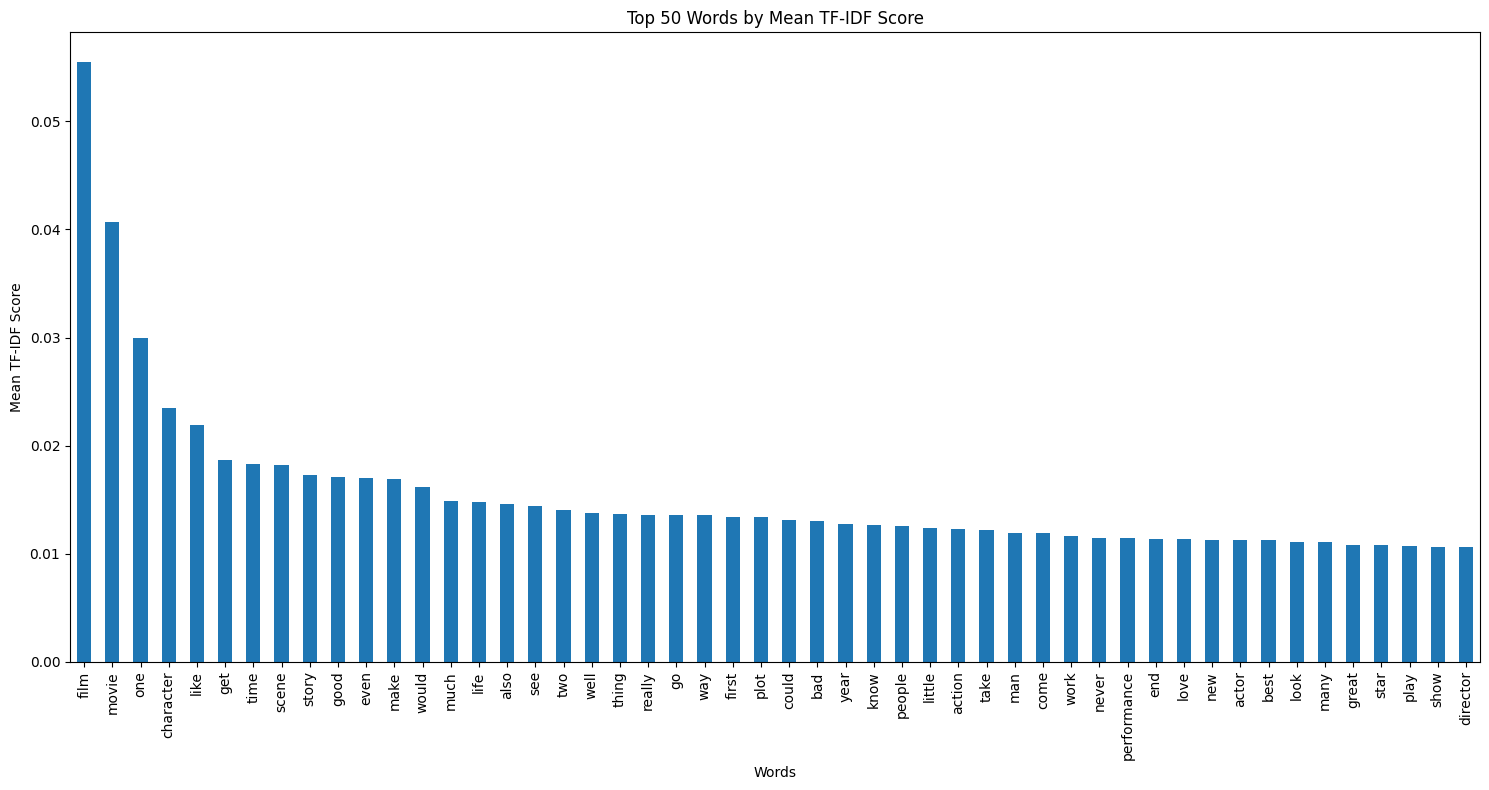

In [20]:
# Display the top 50 words
print("\nTop 50 words by mean TF-IDF score:")
print(top_words.head(50))

# Visualize the top 50 words
plt.figure(figsize=(15, 8))
top_words.head(50).plot(kind='bar')
plt.title('Top 50 Words by Mean TF-IDF Score')
plt.xlabel('Words')
plt.ylabel('Mean TF-IDF Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

What are some words that rank high in terms of TF-IDF score but not in terms of frequency?

In [29]:
# find words that rank high in terms of TF-IDF score but not in terms of frequency
# Calculate word frequencies
word_freq = df['Processed_Review'].str.split(expand=True).stack().value_counts()

# Normalize word frequencies
word_freq_normalized = word_freq / word_freq.sum()

# Calculate the rank difference between TF-IDF and frequency
rank_diff = pd.DataFrame({
    'tfidf_rank': top_words.rank(ascending=False),
    'freq_rank': word_freq_normalized.rank(ascending=False)
})
rank_diff['rank_difference'] = rank_diff['freq_rank'] - rank_diff['tfidf_rank']

# Sort by rank difference to find words with high TF-IDF rank but low frequency rank
interesting_words = rank_diff.sort_values('rank_difference', ascending=False)

print("Top 50 words with high TF-IDF score but low frequency:")
print(interesting_words.head(50))


Top 20 words with high TF-IDF score but low frequency:
               tfidf_rank  freq_rank  rank_difference
wincer            15535.5    27838.5          12303.0
youre             15535.5    27838.5          12303.0
zdenek            15668.5    27838.5          12170.0
kolya             15668.5    27838.5          12170.0
kale              15765.0    27838.5          12073.5
watchabe          15787.5    27838.5          12051.0
sooo              15787.5    27838.5          12051.0
fledged           16212.5    27838.5          11626.0
extremly          16212.5    27838.5          11626.0
pallbearer        16244.0    27838.5          11594.5
mace              16355.0    27838.5          11483.5
fruitition        16543.0    27838.5          11295.5
cairo             16581.0    27838.5          11257.5
snoozing          16581.0    27838.5          11257.5
manhatten         16581.0    27838.5          11257.5
outshining        16594.5    27838.5          11244.0
conning           16594.5  

#### Visualizing the Data

Let's visualize the most important words in the corpus.

##### Word Cloud

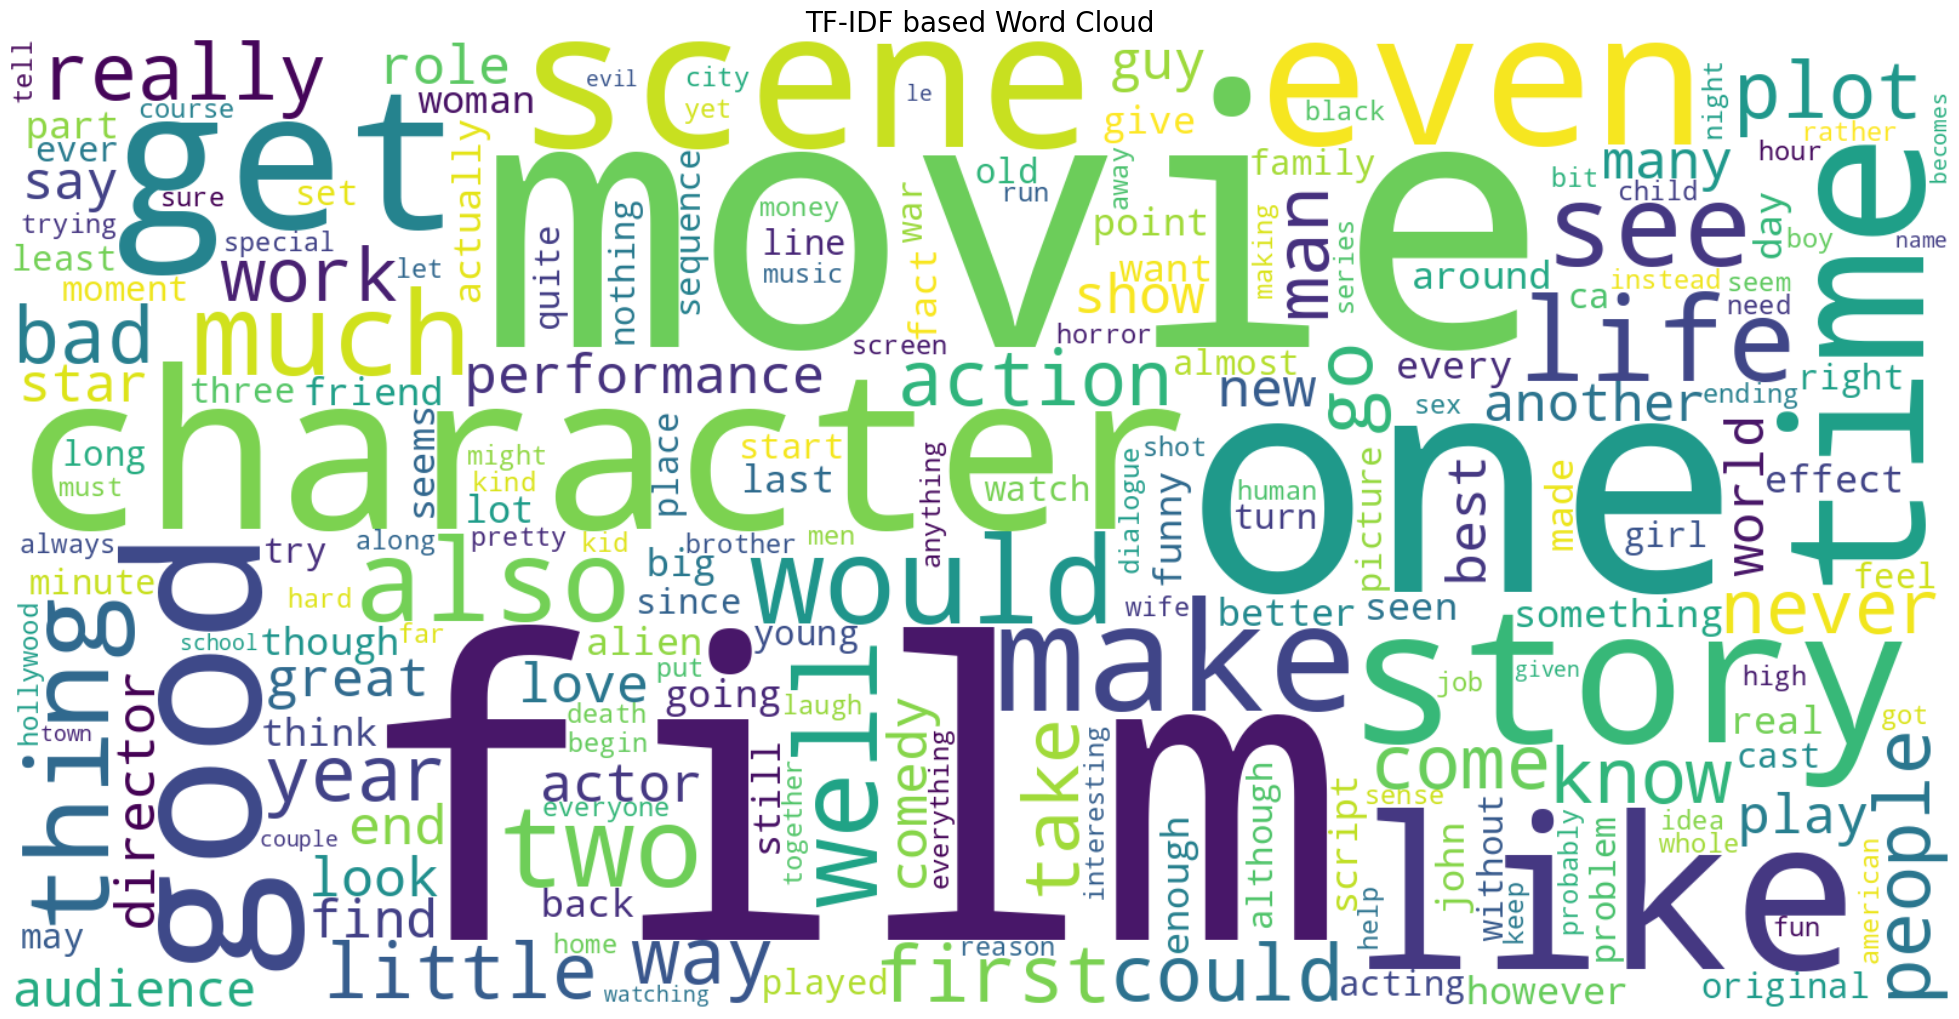

In [26]:
from wordcloud import WordCloud

# Use the existing TF-IDF data
tfidf_dict = top_words.to_dict()

# Generate TF-IDF based word cloud
tfidf_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

# Create the plot
plt.figure(figsize=(20, 10))
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF based Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

For more complex feature representation methods that are able to provide a measure of meaning, based on the *distrubutional hypothesis* that the context in which words are used provides a clue to the meaning, we can use **Word Embeddings** which represents words in continuous vector space (e.g., Word2Vec, GloVe). Check out the GRS book for more details!

---

## Discovery

### Overview

**Discovery** involves using unsupervised learning techniques to find hidden structures, patterns, or themes in text data without predefined labels.

Key concepts:

- **Unsupervised Learning**: Learning patterns from unlabeled data.
- **Topic Modeling**: Identifying topics within a corpus.
- **Clustering**: Grouping similar documents.
- **Dimensionality Reduction**: Reducing the number of features while retaining important information.

# inductory process
![]

### Unsupervised Learning

Unlike supervised learning, unsupervised learning doesn't rely on labeled data. It aims to find inherent structures within the data.

Common unsupervised learning tasks in text analysis:

- **Topic Modeling**: Discovering abstract topics that occur in a collection of documents.
- **Document Clustering**: Grouping documents with similar content.
- **Word Embeddings**: Learning vector representations of words.

### Topic Modeling

Topic modeling algorithms help in identifying hidden thematic structures in text data. The most commonly used algorithms are:

- **Latent Dirichlet Allocation (LDA)**
- **Non-Negative Matrix Factorization (NMF)**

### Clustering

Clustering algorithms group similar documents based on their features.

- **K-Means Clustering**
- **Hierarchical Clustering**

---

### Coding Example

We'll perform topic modeling using Latent Dirichlet Allocation (LDA) and cluster documents using K-Means clustering.

#### Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Scikit-learn libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Install and import wordcloud
!pip install wordcloud
from wordcloud import WordCloud

# NLTK data downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#### Loading and Preprocessing Data

We'll use the preprocessed data from the previous section.

In [ ]:
# Assuming df is already loaded and preprocessed
df.head()

#### Topic Modeling with LDA

##### Vectorize the Text Data

In [ ]:
# Use CountVectorizer for LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['Processed_Review'])

##### Apply LDA

In [ ]:
# Set the number of topics
n_topics = 5

# Initialize LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

##### Display the Top Words for Each Topic

In [ ]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx+1}:")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, n_top_words)

#### Clustering with K-Means

##### Vectorize the Text Data with TF-IDF

In [ ]:
# Use TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Review'])

##### Apply K-Means Clustering

In [ ]:
# Choose the number of clusters
n_clusters = 5

# Initialize K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Assign clusters to documents
df['Cluster'] = kmeans.labels_

#### Visualizing Clusters

##### Apply PCA

In [ ]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X_tfidf.toarray())
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

##### Plot the Clusters

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=set(df['Cluster']))
plt.title('Document Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

---

### Exercise

**Try it yourself**:

- Experiment with different numbers of topics in LDA.
- Try other clustering algorithms like Agglomerative Clustering.
- Use t-SNE for dimensionality reduction and visualization.

---

## Measurement

### Overview

**Measurement** involves quantifying specific attributes or behaviors within text data.

Key concepts:

- **Sentiment Analysis**: Measuring the sentiment (positive, negative, neutral) of text.
- **Readability Scores**: Assessing the complexity and readability of text.
- **Content Analysis**: Coding text into predefined categories or themes.

### Sentiment Analysis

Sentiment analysis determines the emotional tone behind a series of words. It's commonly used to understand customer opinions, public mood, etc.

Approaches:

- **Lexicon-Based Methods**: Use predefined dictionaries of positive and negative words.
- **Machine Learning Models**: Train classifiers on labeled datasets.

### Readability Scores

Readability scores assess how easy or difficult a text is to read. Common metrics include:

- **Flesch Reading Ease**
- **Gunning Fog Index**
- **SMOG Index**

---

### Coding Example

We'll perform sentiment analysis, calculate readability scores, and demonstrate basic content analysis.

#### Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Text processing libraries
from textblob import TextBlob
!pip install textstat
import textstat

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#### Sentiment Analysis with TextBlob

##### Install and Import TextBlob

In [ ]:
# Install TextBlob if not already installed
!pip install textblob

from textblob import TextBlob

##### Analyze Sentiment

We'll calculate the sentiment polarity of each review.

In [ ]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the reviews
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Display the first few entries
df[['Review', 'Sentiment']].head()

##### Visualize Sentiment Distribution

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Sentiment'], bins=20, color='purple', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

#### Readability Scores with TextStat

##### Install and Import TextStat

In [ ]:
# Install textstat if not already installed
!pip install textstat

import textstat

##### Calculate Readability Scores

We'll compute the Flesch Reading Ease score for each review.

In [ ]:
# Function to get Flesch Reading Ease score
def get_readability(text):
    return textstat.flesch_reading_ease(text)

# Apply the function to the reviews
df['Readability'] = df['Review'].apply(get_readability)

# Display the first few entries
df[['Review', 'Readability']].head()

##### Visualize Readability Distribution

In [ ]:
# Plot readability distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Readability'], bins=20, color='green', edgecolor='black')
plt.title('Readability Score Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.show()

#### Content Analysis with Manual Coding

We'll perform a simple content analysis by classifying reviews as 'Positive' or 'Negative' based on sentiment scores.

##### Define a Function to Classify Reviews

In [ ]:
def classify_review(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function
df['Sentiment_Label'] = df['Sentiment'].apply(classify_review)

# Display the first few entries
df[['Review', 'Sentiment', 'Sentiment_Label']].head()

##### Analyze the Distribution

In [ ]:
# Count of sentiment labels
sentiment_counts = df['Sentiment_Label'].value_counts()
print(sentiment_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

---

### Exercise

**Try it yourself**:

- Use a machine learning model (e.g., Logistic Regression) for sentiment classification.
- Calculate other readability scores like Gunning Fog Index.
- Perform a more detailed content analysis by defining custom categories.

---

## Conclusion

In this workshop, we've covered:

1. **Retrieving Text Data Using APIs**: How to access and collect text data programmatically.
2. **Selection and Representation**: Selecting appropriate text data and converting it into numerical features.
3. **Discovery**: Uncovering hidden patterns using unsupervised learning techniques.
4. **Measurement**: Quantifying specific attributes within text data, such as sentiment and readability.

**Key Takeaways**:

- **APIs are Essential**: They enable automated and customizable data retrieval.
- **Preprocessing is Fundamental**: Proper data cleaning leads to better analysis.
- **Diverse Techniques**: Multiple methods exist for analyzing text data; choose based on your objectives.

**Next Steps**:

- **Expand Data Retrieval Skills**: Explore other APIs or web scraping (while adhering to legal and ethical guidelines).
- **Enhance Analysis Techniques**: Dive deeper into advanced models and algorithms.
- **Apply to Real-world Projects**: Use these skills on datasets relevant to your field of interest.

---

Thank you for participating in this workshop! We hope you've gained valuable insights into handling text as data using Python.

**Questions or Comments?**

Feel free to explore additional resources to continue your learning journey.

---

## Additional Resources

- **APIs and Data Retrieval**:
  - [NewsAPI Documentation](https://newsapi.org/docs)
  - [Reddit API Documentation](https://www.reddit.com/dev/api/)
  - [Requests Library Documentation](https://requests.readthedocs.io/en/latest/)

- **Books**:
  - *Mining the Social Web* by Matthew A. Russell

- **Online Tutorials**:
  - [Sentiment Analysis of Movie Reviews in NLTK python](https://medium.com/@joel_34096/sentiment-analysis-of-movie-reviews-in-nltk-python-4af4b76a6f3)
  - [Real Python - APIs and Web Scraping](https://realpython.com/api-integration-in-python/)
  - [DataCamp - Working with APIs](https://www.datacamp.com/community/tutorials/using-apis-in-python)

- **Datasets**:
  - [Kaggle Datasets](https://www.kaggle.com/datasets)
  - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

---

*End of Tutorial*